<font size=6, font color=blue>**PA005: Customer Clustering**

# Solution Planning

## Input

- Business Problem
    * Select most valuable customers to create a loyalty program called Insiders


- Data
    * One year of e-commerce sales

## Output

* A list of customers that will be part of Insiders
* A report answering business questions
    1. Who are the eligible customers to participate in the Insiders program? 
    2. How many customers will be part of the program?
    3. What are the main characteristics of these customers? 
    4. What revenue percentage comes from Insiders?
    5. What is the Insiders' expected revenue for the coming months?
    6. What are the conditions for a customer to be eligible for the Insiders program? 
    7. What are the conditions for a customer to be removed from the Insiders program?
    8. What is the guarantee that the Insiders program is better than the regular customer database? 
    9. What actions can the marketing team make to increase the revenue?

## Tasks

* A report answering business questions:
    1. Who are the eligible customers to participate in the Insiders program?
        - Understand the criteria to a eligible customer. 
        - Criteria examples:
            * Revenue
                * High average ticket
                * High LTV (lifetime value)
                * Low recency
                * High basket size
                * Low churn probability
            * Expenses
                * Return rate
            * Buying Experience
                * High average notes on reviews<br><br>
                
    2. How many customers will be part of the program?
        - Calculate the percentage of customers that belong to Insiders program over the total number of customers.<br><br>
                
    3. What are the main characteristics of these customers? 
        - Indicate customer characteristics:
            * Age
            * City
            * Education level
            * Localization, etc.
        - Indicate consumption characteristics:
            * Clusters attributes<br><br>
                
    4. What revenue percentage comes from Insiders?
        - Calculate the percentage of Insiders revenue over the total revenue.<br><br>
                
    5. What is the Insiders' expected revenue for the coming months?
        - Calculate Insiders' LTV
        - Calculate Cohort Analysis.<br><br>
        
    6. What are the conditions for a customer to be eligible for the Insiders program? 
        - Define verification periodicity (monthly, quarterly, etc.) 
        - The customer must be similar to a customer on Insiders.<br><br>
                
    7. What are the conditions for a customer to be removed from the Insiders program?
        - Define verification periodicity (monthly, quarterly, etc.) 
        - The customer must be dissimilar to a customer on Insiders.<br><br>
            
    8. What is the guarantee that the Insiders program is better than the regular customer database? 
        - Perform A/B Test
        - Perform A/B Bayesian Test  
        - Perform Hypothesis Test <br><br>
                        
    9. What actions can the marketing team make to increase the revenue?
        - Discount
        - Buying preferences
        - Shipping options
        - Promote a visit to the company, etc.

* Solution Benchmark
    - Desk Research <br>
        <font color=red>* INSERIR EXEMPLOS APLICADOS NO MERCADO </font><br>
        * 

# Imports

In [1]:
import numpy       as np
import pandas      as pd
import seaborn     as sns
import umap.umap_  as umap
import regex       as re

from IPython.core.display  import HTML
from matplotlib            import pyplot           as plt
from plotly                import express          as px

from sklearn               import cluster          as c
from sklearn               import metrics          as sm
from sklearn               import preprocessing    as pp
from yellowbrick.cluster   import KElbowVisualizer, SilhouetteVisualizer 

## Helper Functions

In [2]:
def personal_settings():
    # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:90% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)
        
    # seaborn settings
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)

In [3]:
personal_settings()

## Load Dataset

In [17]:
df_raw = pd.read_csv(r'../data/raw/ecommerce.csv', encoding='unicode_escape')
display(df_raw.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom,NaN


In [18]:
# drop 'unnamed: 8' column
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis =1)

# Data Description

In [19]:
df2 = df_raw.copy()

## Rename Columns

In [20]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [21]:
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df2.columns = cols_new
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## Data Dimensions

In [22]:
print('Number of rows: {}'.format(df2.shape[0]))
print('Number of cols: {}'.format(df2.shape[1]))

Number of rows: 541909
Number of cols: 8


## Data Types

In [23]:
print(df2.dtypes)
display(df2.head())

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


## Check NA

In [24]:
df2.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [25]:
# c01 metrics - removing NA
df2 = df2.dropna(subset=['description','customer_id'])
print ('Removed data: {:.2f}'.format(1 - df2.shape[0]/df_raw.shape[0]))
print('Remaining rows: {}'.format(df2.shape[0]))

df2.isna().sum()

Removed data: 0.25
Remaining rows: 406829


invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change dtypes

In [26]:
print(df2.dtypes)
display(df2.head())

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.00,United Kingdom


In [27]:
# checking 'invoice_no' by forcing change to integer
#df2['invoice_no'] =df2['invoice_no'].astype(int)

# note: error indicates that this feature also has letters, therefore must remain as 'object'

In [28]:
# changing 'invoice_date' format
df2['invoice_date'] = pd.to_datetime (df2['invoice_date'], format='%d-%b-%y')
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.00,United Kingdom


In [29]:
# changing 'customer_id' by forcing change to integer
df2['customer_id'] = df2['customer_id'].astype('int64')
df2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850,United Kingdom


In [30]:
# checking final dtypes
df2.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int64
country                 object
dtype: object

## Descriptive Statistics

In [31]:
num_df2 = df2.select_dtypes(include=['int64','float64'])
cat_df2 = df2.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [32]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df2.apply(np.mean)).T
ct2 = pd.DataFrame(num_df2.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df2.apply(np.std)).T
d2 = pd.DataFrame(num_df2.apply(min)).T
d3 = pd.DataFrame(num_df2.apply(max)).T
d4 = pd.DataFrame(num_df2.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df2.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df2.apply(lambda x: x.kurtosis())).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,quantity,-80995.00,80995.00,161990.00,12.06,5.00,248.69,0.18,94317.56
1,unit_price,0.00,38970.00,38970.00,3.46,1.95,69.32,452.22,246924.54
2,customer_id,12346.00,18287.00,5941.00,15287.69,15152.00,1713.60,0.03,-1.18


#### <font color=red>Numerical Attributes Investigation

In [33]:
# Negative 'quantity' means devolution?

# 'unit_price' equals 0 means promotion?

### Categorical Attributes

In [34]:
cat_df2.head()

,invoice_no,stock_code,description,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
1,536365,71053,WHITE METAL LANTERN,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,United Kingdom


In [35]:
# === 'invoice_no' 

# checking 'invoice_no' that have at least one letter
invoice_no_oneletter = df2.loc[df2['invoice_no'].apply(lambda x: bool(re.search('[^0-9]+', x))),:]
print('Number of invoices that have at least one letter:', invoice_no_oneletter.shape[0])
print('Number of invoices that have at least one letter and have NEGATIVE "quantity":', invoice_no_oneletter[invoice_no_oneletter['quantity']<0].shape[0],'\n')
print('Therefore, all invoices that have at least one letter might be a return or change.')

Number of invoices that have at least one letter: 8905
Number of invoices that have at least one letter and have NEGATIVE "quantity": 8905 

Therefore, all invoices that have at least one letter might be a return or change.


In [36]:
# === 'stock_code'

# checking 'stock_code' that have at least ONE letter
stockcode_oneletter = df2.loc[df2['stock_code'].apply(lambda x: bool(re.search('[^0-9]+', x))),:]
print('Number of stock codes that have at least one letter:', stockcode_oneletter.shape[0])
print('\nNumber of stock codes that have at least one letter and have NEGATIVE "quantity":', stockcode_oneletter[stockcode_oneletter['quantity']<0].shape[0],'\n')

# checking 'stock_code' that have ONLY letters
stockcode_onlyletters = df2.loc[df2['stock_code'].apply(lambda x: bool(re.search('^[a-zA-Z]+$', x))),:]
print('\nNumber of stock codes that have only letters:', stockcode_onlyletters.shape[0])
print('\nUnique values of "stock_code" that have only letters:\n', stockcode_onlyletters['stock_code'].unique())
print('\nUnique values of "description" from stock codes that have only letters: \n', stockcode_onlyletters['description'].unique())

# next cycle, remove stockcode_onlyletters: ['POST' 'D' 'M' 'PADS' 'DOT' 'CRUK'] 

Number of stock codes that have at least one letter: 35809

Number of stock codes that have at least one letter and have NEGATIVE "quantity": 1004 


Number of stock codes that have only letters: 1774

Unique values of "stock_code" that have only letters:
 ['POST' 'D' 'M' 'PADS' 'DOT' 'CRUK']

Unique values of "description" from stock codes that have only letters: 
 ['POSTAGE' 'Discount' 'Manual' 'PADS TO MATCH ALL CUSHIONS'
 'DOTCOM POSTAGE' 'CRUK Commission']


In [37]:
# === 'country'
print('Unique countries:', df2['country'].unique().shape[0])
df2['country'].value_counts(normalize=True).head()

Unique countries: 37


United Kingdom   0.89
Germany          0.02
France           0.02
EIRE             0.02
Spain            0.01
Name: country, dtype: float64

# Variable Filtering

In [138]:
df3 = df2.copy()
df3.head(2)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850,United Kingdom


In [139]:
# 'stock_code' is not only letters
df3 = df3.loc[~df3['stock_code'].isin(stockcode_onlyletters)]

# dropping 'description'
df3 = df3.drop(columns='description', axis=1)

# 'unit_price' > 0.04
df3 = df3.loc[df3['unit_price']>=0.04,:]

# country
df3 = df3[~df3['country'].isin(['European Community', 'Unspecified'])]

# 'quantity' is negative/positive
df3_returns = df3.loc[df3['quantity']<0,:]
df3_purchases = df3.loc[df3['quantity']>=0,:]

# Feature Engineering

In [204]:
df4 = df3.copy()

## Feature Creation

In [205]:
# data reference
df_ref = df4.drop(['invoice_no','stock_code', 'quantity','invoice_date','unit_price','country'],
                  axis=1).drop_duplicates(ignore_index=True)
print('Data reference shape:', df_ref.shape)
df_ref.head()

Data reference shape: (4366, 1)


,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [206]:
# === MONETARY 

# creating 'gross_revenue' (= quantity * price)
df3_purchases.loc[:,'gross_revenue'] = df3_purchases.loc[:,'quantity']*df3_purchases.loc[:,'unit_price']

# creating 'monetary'
df_monetary = df3_purchases.loc[:,['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

# merging dataframes
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
df_ref.isna().sum() # checking NA

# --- Note
# The 27 NA refers to customers that only returned something
# This can happen due to the date range on the dataset

c:\users\maria\documents\venvs\p003_clustering_customers\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


customer_id       0
gross_revenue    33
dtype: int64

In [207]:
# === RECENCY (last day of purchase)
df_recency = df3_purchases.loc[:,['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency['recency_days'] = (df3_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days # dt vectorize the series to apply 'days' command
df_recency = df_recency[['customer_id','recency_days']].copy()

# merging dataframes
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')
df_ref.isna().sum() # checking NA

customer_id       0
gross_revenue    33
recency_days     33
dtype: int64

In [208]:
# === FREQUENCY (number of purchases)
df_freq = df3_purchases.loc[:,['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq = df_freq.rename(columns={'customer_id': 'customer_id','invoice_no': 'invoice_freq'}) # changing columns names

# merging dataframes
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
df_ref.isna().sum() # checking NA

customer_id       0
gross_revenue    33
recency_days     33
invoice_freq     33
dtype: int64

In [209]:
# === AVG TICKET (how much is spend on avg)
df_avgticket = df3_purchases.loc[:,['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index()
df_avgticket = df_avgticket.rename(columns={'gross_revenue':'avg_ticket'})

# merging dataframes
df_ref = pd.merge(df_ref, df_avgticket, on='customer_id', how='left')
df_ref.isna().sum() # checking NA

customer_id       0
gross_revenue    33
recency_days     33
invoice_freq     33
avg_ticket       33
dtype: int64

In [210]:
# === RETURNS (quantity of devolutions)
# df_returns = df3_returns[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index().rename(columns={'invoice_no':'returns','customer_id':'customer_id'})

# # merging dataframes
# df_ref = pd.merge(df_ref, df_returns, how='left', on='customer_id')
# df_ref.loc[df_ref['returns'].isna(), 'returns']=0
# print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
# print('Data reference shape:', df_ref.shape)
# df_ref.head()

In [211]:
df_ref.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket
0,17850,5391.21,372.00,34.00,18.15
1,13047,3237.54,31.00,10.00,18.82
2,12583,7281.38,2.00,15.00,29.48
3,13748,948.25,95.00,5.00,33.87
4,15100,876.00,333.00,3.00,292.00


# EDA (Exploratory Data Analysis)

In [212]:
df5 = df_ref.dropna().copy()
df5.isna().sum()

customer_id      0
gross_revenue    0
recency_days     0
invoice_freq     0
avg_ticket       0
dtype: int64

# Data Preparation

In [213]:
df6 = df5.copy()

In [214]:
ss = pp.StandardScaler()

df6['gross_revenue'] = ss.fit_transform(df6[['gross_revenue']])
df6['recency_days'] = ss.fit_transform(df6[['recency_days']])
df6['invoice_freq'] = ss.fit_transform(df6[['invoice_freq']])
df6['avg_ticket'] = ss.fit_transform(df6[['avg_ticket']])
#df6['returns'] = ss.fit_transform(df6[['returns']])

In [215]:
df6.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket
0,17850,0.37,2.80,3.86,-0.03
1,13047,0.13,-0.61,0.74,-0.03
2,12583,0.58,-0.90,1.39,-0.03
3,13748,-0.12,0.03,0.09,-0.02
4,15100,-0.13,2.41,-0.17,0.15


# Feature Selection

In [216]:
df7 = df6.copy()
df7.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket
0,17850,0.37,2.80,3.86,-0.03
1,13047,0.13,-0.61,0.74,-0.03
2,12583,0.58,-0.90,1.39,-0.03
3,13748,-0.12,0.03,0.09,-0.02
4,15100,-0.13,2.41,-0.17,0.15


# Hypermarameter Fine-Tunning

In [217]:
df8 = df7.copy()
X = df8.drop(columns=['customer_id'])
X.head()

,gross_revenue,recency_days,invoice_freq,avg_ticket
0,0.37,2.80,3.86,-0.03
1,0.13,-0.61,0.74,-0.03
2,0.58,-0.90,1.39,-0.03
3,-0.12,0.03,0.09,-0.02
4,-0.13,2.41,-0.17,0.15


In [218]:
clusters = [2,3,4,5,6,7]

## Within-Cluster Sum of Square (WSS) vs. Silhouette Score (SS)

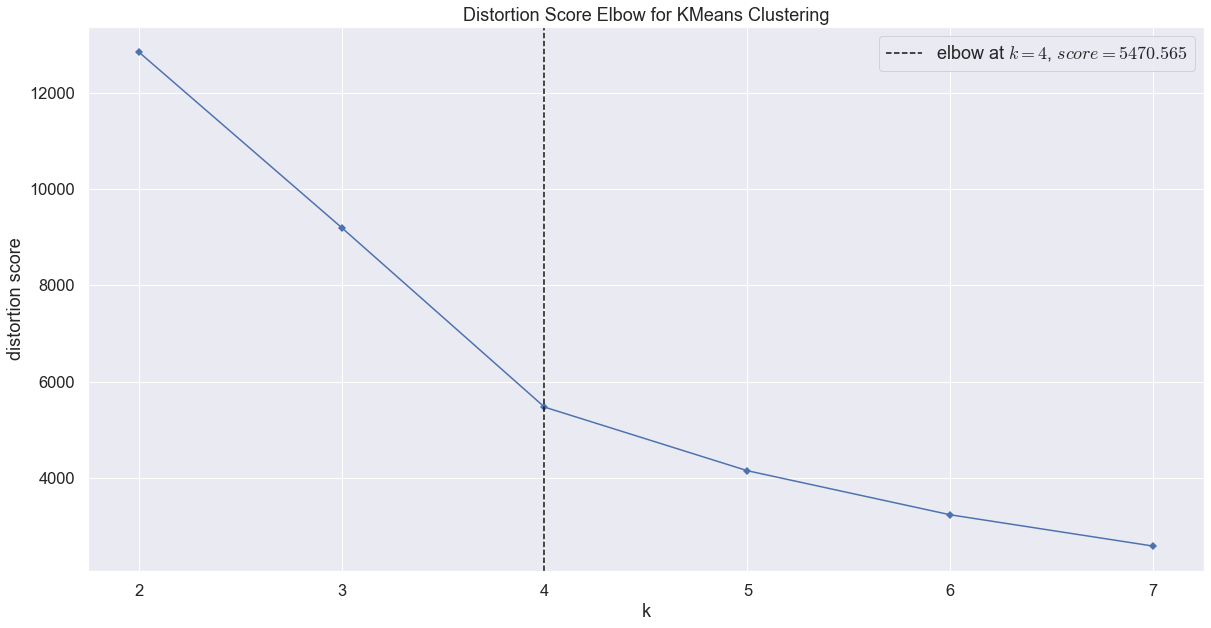

In [219]:
# WSS
kmeans_y = KElbowVisualizer(c.KMeans(), k=clusters, timings=False);
kmeans_y.fit(X);
kmeans_y.show();

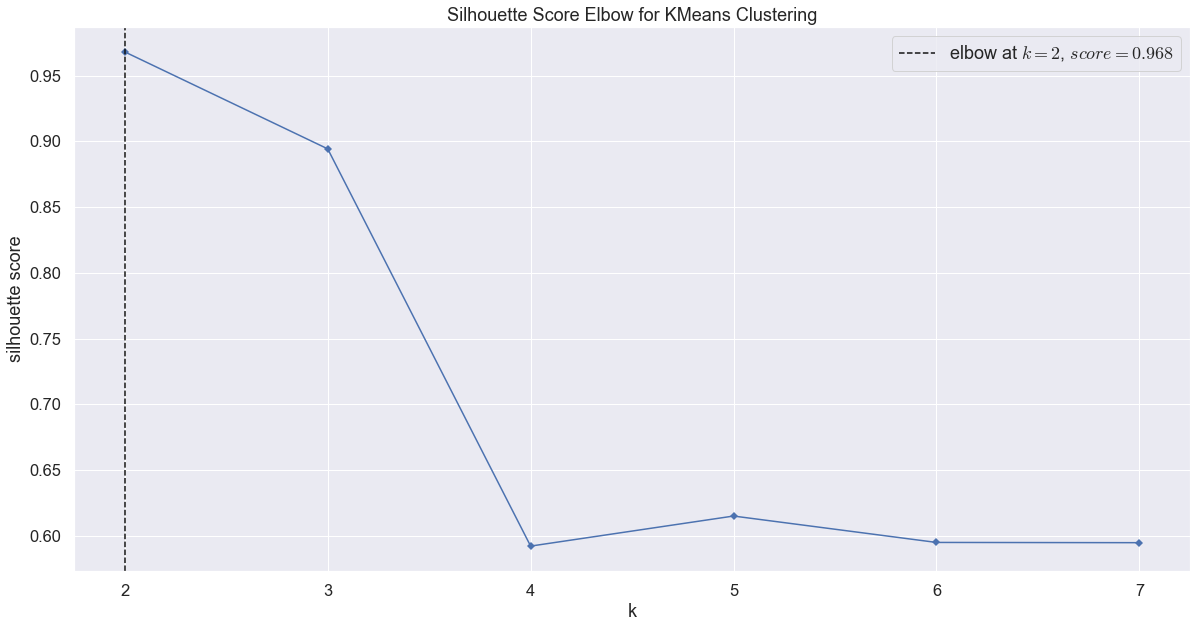

In [220]:
# SS
kmeans_y = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False);
kmeans_y.fit(X);
kmeans_y.show();

## Silhouette Analysis

In [188]:
# == note reminder
# divmod input are numerator and denominator
# divmod output are quotient and remainder
# example:
x, y = divmod(5,2)
print(x, y)

2 1


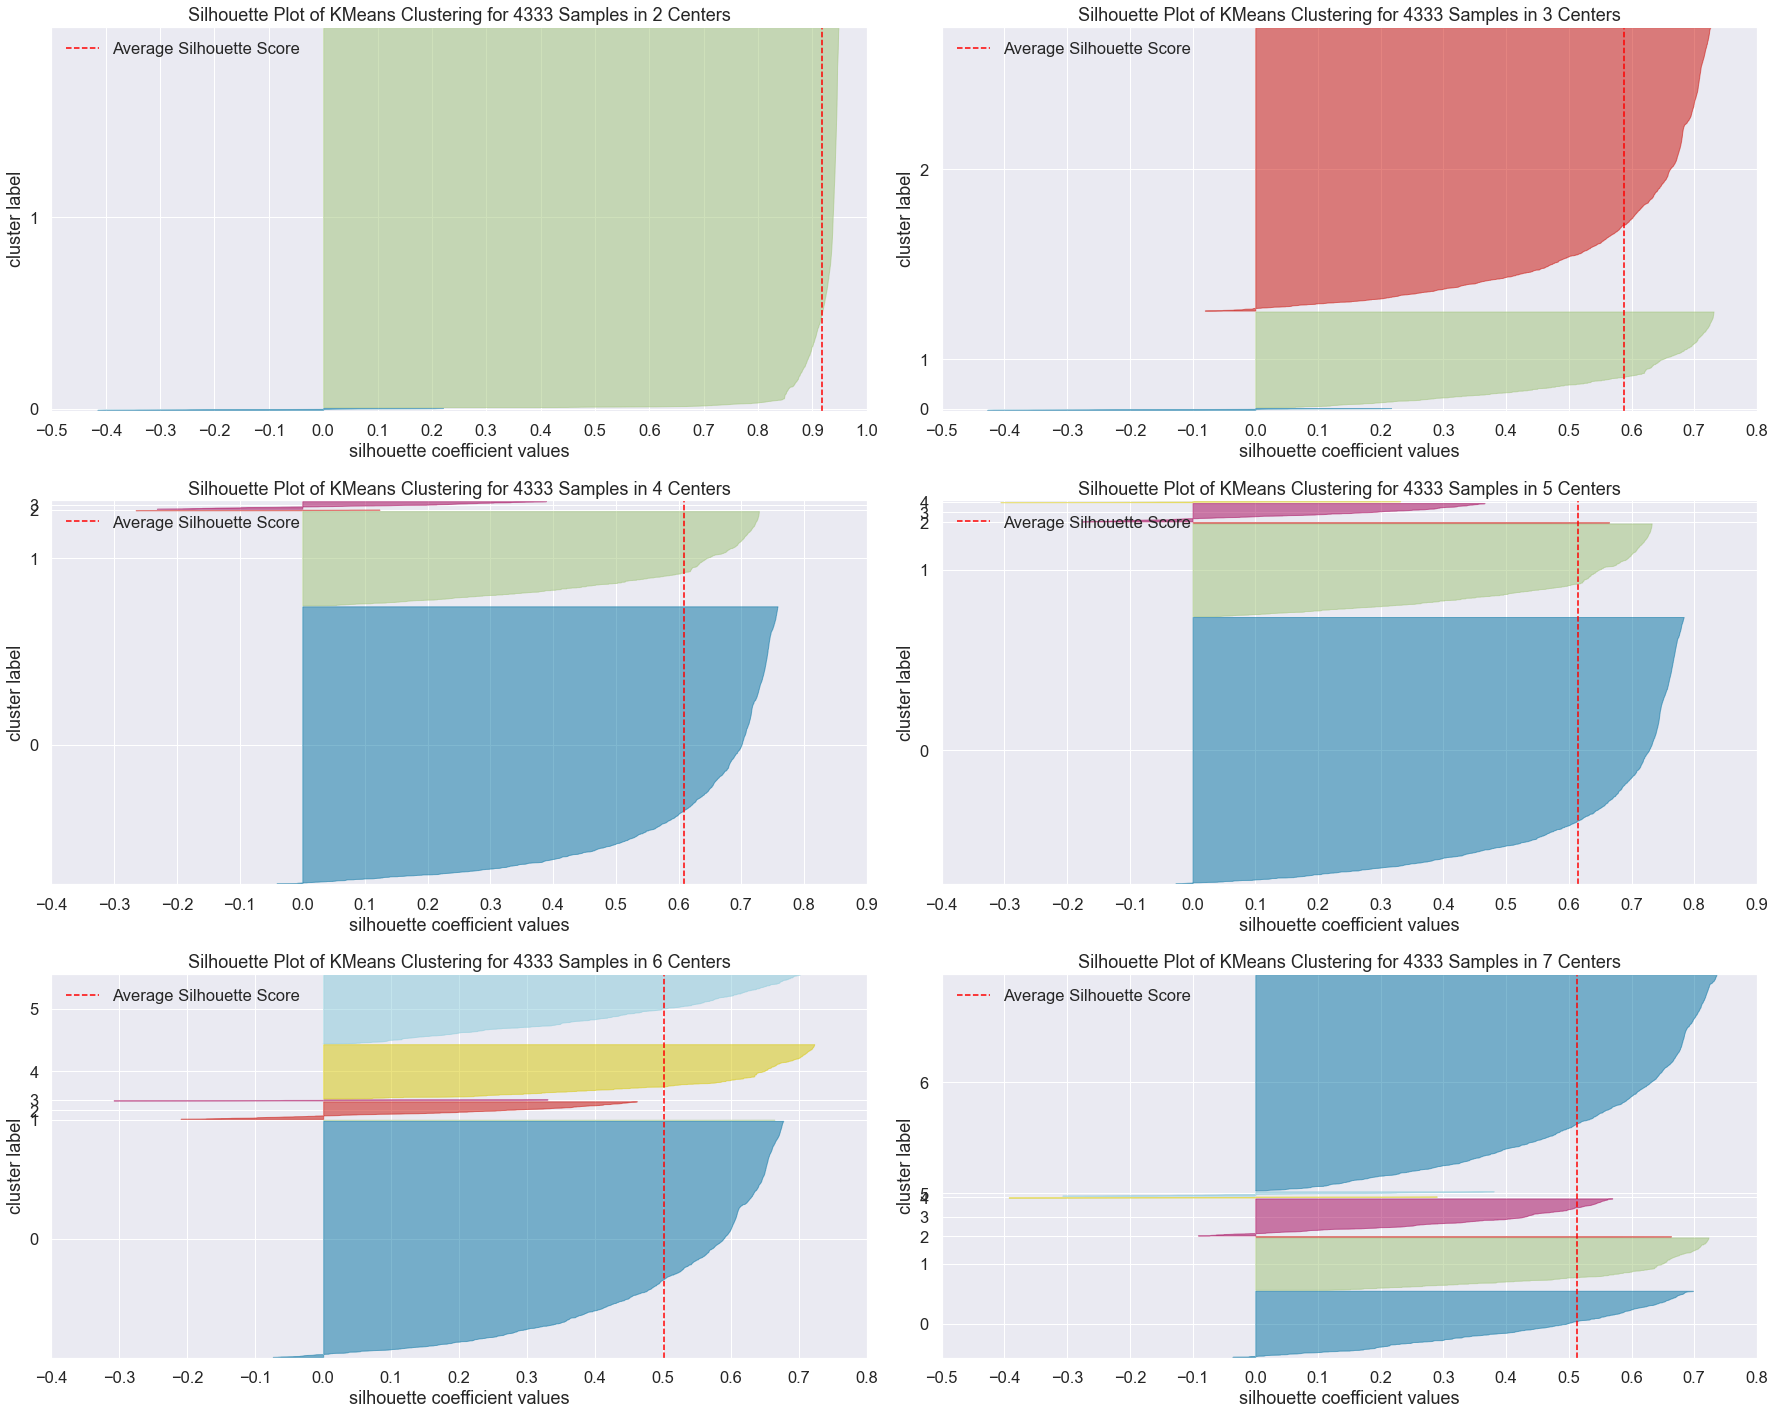

In [222]:
fig, ax = plt.subplots(3,2, figsize=(25,20))


for k in clusters:
    km = c.KMeans (n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, r = divmod(k,2) # quotient and remainder will determine plot position
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][r])
    visualizer.fit(X)
    visualizer.finalize()
    plt.tight_layout()
    
personal_settings()

# Model training

In [223]:
df9 = df8.copy()

## K-Means

In [224]:
# model definition
k = 3
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# model clustering
# labels = kmeans.predict(X) # another way
labels = kmeans.labels_
print(labels)

[1 2 2 ... 2 2 2]


## Cluster Validation

In [225]:
# WSS 
print('WSS value: {}'.format(kmeans.inertia_))

# SS 
print('SS value:  {}'.format(sm.silhouette_score(X, labels, metric='euclidean')))

WSS value: 9415.373836075652
SS value:  0.5885444793509821


# Cluster Analysis

In [226]:
df10=df9.copy()
df10['clusters'] = labels
df10.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,clusters
0,17850,0.37,2.80,3.86,-0.03,1
1,13047,0.13,-0.61,0.74,-0.03,2
2,12583,0.58,-0.90,1.39,-0.03,2
3,13748,-0.12,0.03,0.09,-0.02,2
4,15100,-0.13,2.41,-0.17,0.15,1


## Visualization Inspection

c:\users\maria\documents\venvs\p003_clustering_customers\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


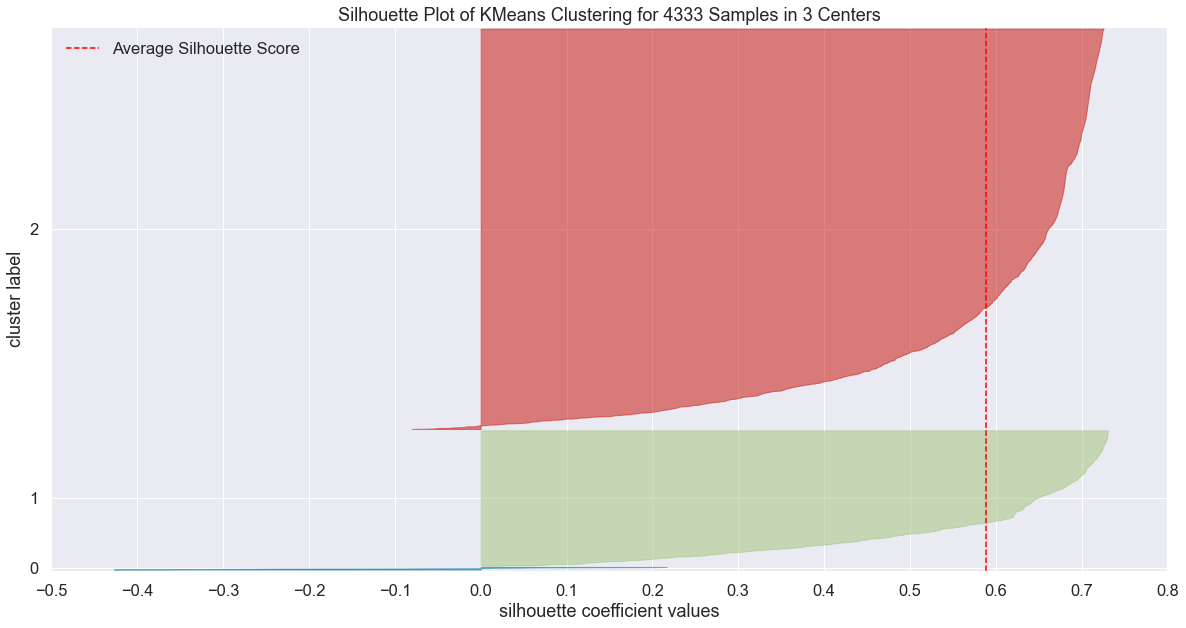

In [227]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 2D Plot

In [228]:
df10.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,clusters
0,17850,0.37,2.80,3.86,-0.03,1
1,13047,0.13,-0.61,0.74,-0.03,2
2,12583,0.58,-0.90,1.39,-0.03,2
3,13748,-0.12,0.03,0.09,-0.02,2
4,15100,-0.13,2.41,-0.17,0.15,1


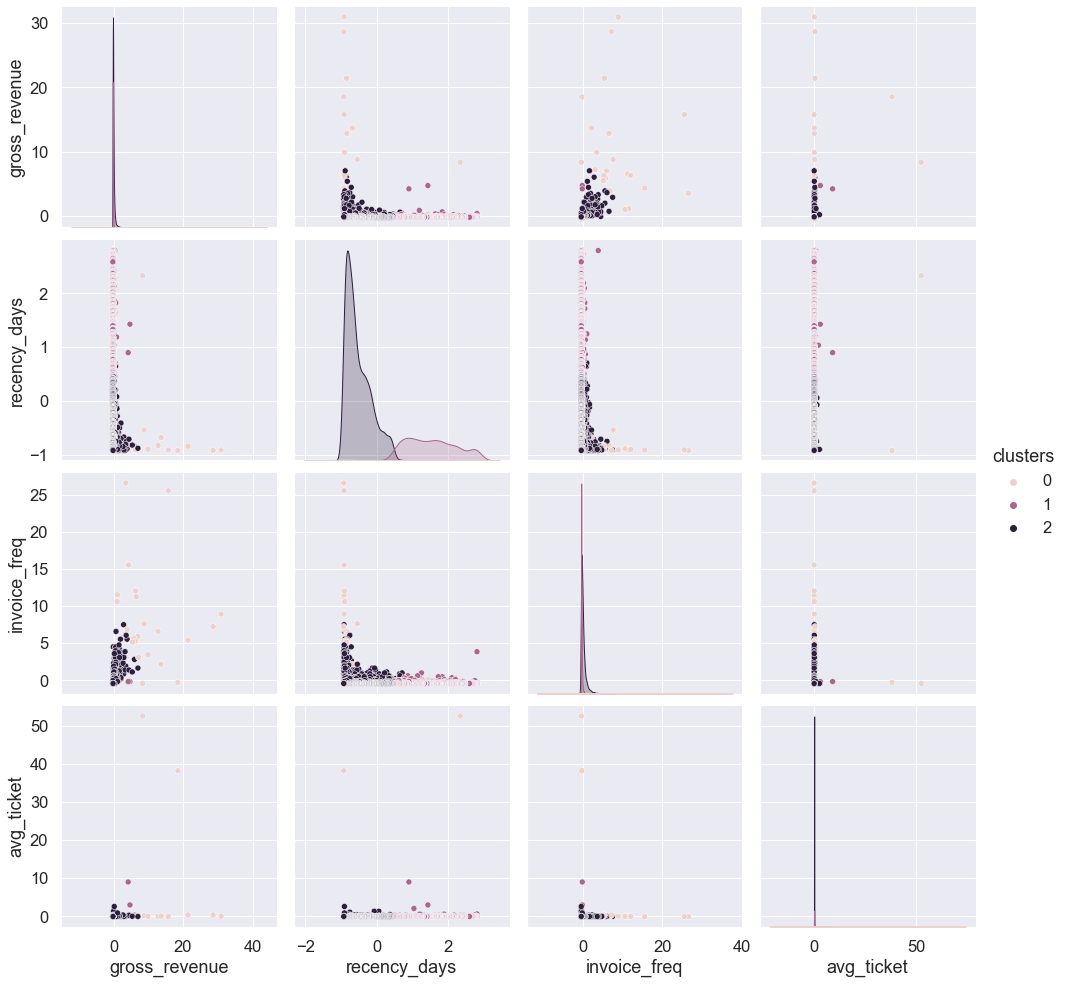

In [229]:
df_viz = df10.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='clusters', height=3.5);

## UMAP

In [230]:
X.head() # X = df_ref without 'customer_id' column

,gross_revenue,recency_days,invoice_freq,avg_ticket
0,0.37,2.80,3.86,-0.03
1,0.13,-0.61,0.74,-0.03
2,0.58,-0.90,1.39,-0.03
3,-0.12,0.03,0.09,-0.02
4,-0.13,2.41,-0.17,0.15


In [231]:
# reducing high dimensionality
reducer = umap.UMAP(n_neighbors=40, random_state=42) # n_neighbors changes clusteres visualization, kind of "zoom in/zoom out"

# projected space
embedding = reducer.fit_transform(X)

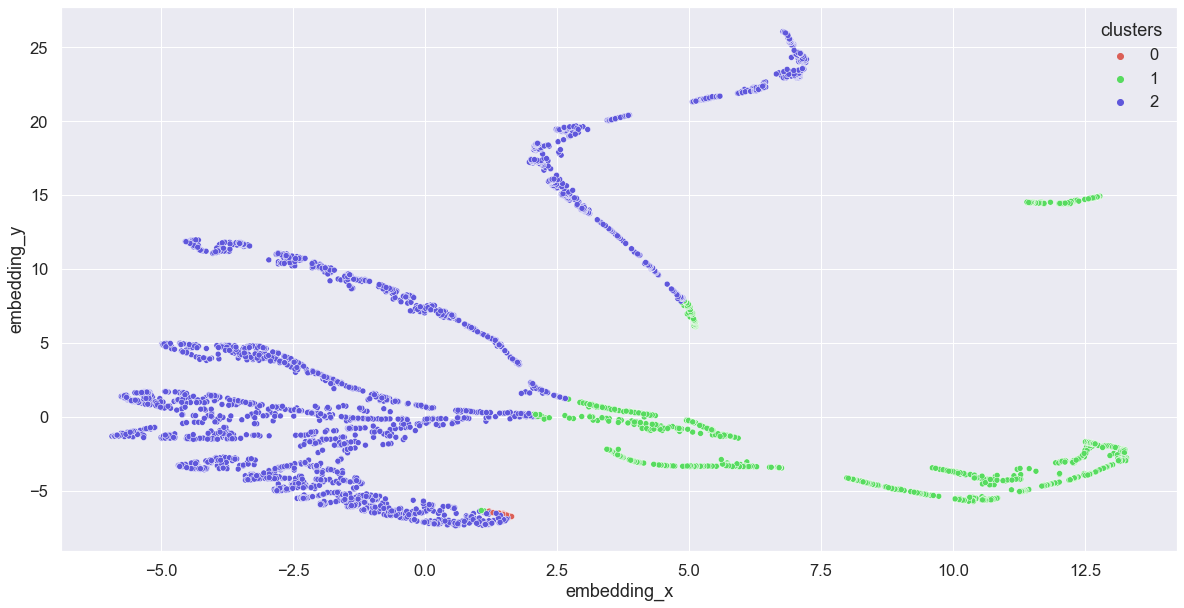

In [232]:
# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='clusters',
                palette=sns.color_palette('hls', n_colors=len(df_viz['clusters'].unique())),
                data=df_viz);

## Cluster Profile

In [200]:
df10.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,returns,clusters
0,17850,0.37,2.80,3.86,-0.03,0.08,1
1,13047,0.13,-0.61,0.74,-0.03,3.35,2
2,12583,0.58,-0.90,1.39,-0.03,1.01,2
3,13748,-0.12,0.03,0.09,-0.02,-0.39,2
4,15100,-0.13,2.41,-0.17,0.15,1.01,1


In [201]:
# number of customers on each cluster
df_cluster = df10[['customer_id','clusters']].groupby('clusters').count().reset_index()
df_cluster['customer_percentage'] = (df_cluster['customer_id'] / df_cluster['customer_id'].sum())*100

# avg gross_revenue
df_avg_grossrevenue = df10[['gross_revenue','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_grossrevenue, how='inner', on='clusters')

# avg recency_days
df_avg_recencydays = df10[['recency_days','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recencydays, how='inner', on='clusters')

# avg incoive_freq
df_avg_invoicefreq = df10[['invoice_freq','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoicefreq, how='inner', on='clusters')

# avg ticket
df_avg_ticket = df10[['avg_ticket','clusters']].groupby('clusters').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how='inner', on='clusters')

df_cluster.sort_values('gross_revenue', ascending=False)

,clusters,customer_id,customer_percentage,gross_revenue,recency_days,invoice_freq,avg_ticket
0,0,39,0.90,6.93,-0.79,6.53,2.37
2,2,3200,73.85,-0.03,-0.51,0.04,-0.03
1,1,1094,25.25,-0.17,1.53,-0.35,-0.01


### <font color=red> Cluster 00:  Insiders
    - Number of Customers:: 6 (0.14% of total of customers)
    - Avg Recency Days: 7 
    - Avg Quantity of Invoices: 89
    - Avg Gross Revenue: $182,181.98	
        
###  <font color=red> Cluster 01:
    - Number of Customers: 28 (0.64% of total of customers)
    - Avg Recency Days: 6
    - Avg Quantity of Invoices: 58
    - Avg Gross Revenue: $42,614.39
    
###  <font color=red> Cluster 03:
    - Number of Customers: 267 (6.11% of total of customers)
    - Avg Recency Days: 20
    - Avg Quantity of Invoices: 20
    - Avg Gross Revenue: $8,089.03

### <font color=red>  Cluster 02:
    - Number of Customers: 4.071 (93,12% of total of customers)
    - Avg Recency Days: 97
    - Avg Quantity of Invoices: 4
    - Avg Gross Revenue: $946.70

# Deploy to Production